**Context:** 

Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.

This archive contains 2075259 measurements gathered between December 2006 and November 2010 (47 months).

**Notes:**

1. (globalactivepower*1000/60 - submetering1 - submetering2 - submetering3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

2. The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

**Attribute Information:**

1. **date :** Date in format dd/mm/yyyy

2. **time :** time in format hh:mm:ss

3. **globalactivepower :** household global minute-averaged active power (in kilowatt)

4. **globalreactivepower :** household global minute-averaged reactive power (in kilowatt)

5. **voltage :** minute-averaged voltage (in volt)

6. **global_intensity :** household global minute-averaged current intensity (in ampere)

7. **submetering1 :** energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8. **submetering2 :** energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9. **submetering3 :** energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
pd.set_option('display.max_rows', 100)

In [3]:
na_values = "", "#N/A", "#N/A N/A", "#NA", "-1.#IND", "-1.#QNAN", "-NaN", "-nan", "1.#IND", "1.#QNAN", "<NA>", "N/A", "NA", "NULL", "NaN", "n/a", "nan", "null" , "?"
df = pd.read_csv('../data/household_power_consumption.txt', delimiter=";", na_values=na_values)

In [4]:
df["DateTime"] = df["Date"] +" "+ df["Time"]

In [5]:
df.Date = pd.to_datetime(df.Date, format="%d/%m/%Y")
df.DateTime = pd.to_datetime(df.DateTime,format="%d/%m/%Y %H:%M:%S")
df.Time = pd.to_datetime(df.Time, format="%H:%M:%S").dt.time

In [6]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   DateTime               datetime64[ns]
dtypes: datetime64[ns](2), float64(7), object(1)
memory usage: 158.3+ MB


In [8]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [9]:
df.duplicated().value_counts()

False    2075259
dtype: int64

In [10]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
DateTime                     0
dtype: int64

In [39]:
from datetime import date, timedelta

,0
0,2006-12-16
1,2006-12-17
2,2006-12-18
3,2006-12-19
4,2006-12-20
...,...
1437,2010-11-22
1438,2010-11-23
1439,2010-11-24
1440,2010-11-25


In [75]:
# mes_dates = df.Date.to_period("D")

mes_dates = pd.Series(df.Date.unique()).sort_values()
start_date = mes_dates[0]
end_date = mes_dates[len(mes_dates)-1]
numdays = (end_date - start_date).days

mes_dates = list(mes_dates)

all_dates = []

for x in range (0, (numdays+1)):
    all_dates.append(start_date + timedelta(days = x))

dates_missing = []

for i in range(0, len(all_dates)):
   if (all_dates[i] not in mes_dates):
       dates_missing.append(all_dates[i])
   else:
       pass
    
print(str(start_date)+" à "+str(end_date))
pd.DataFrame(dates_missing)

In [ ]:
sns.countplot(x=df.Global_intensity.isna(), data=df)

In [13]:
pd.DataFrame(df.isna().value_counts()).plot()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [33]:
df[df['Date']=="2010-02-09"].nunique()

Date                        1
Time                     1440
Global_active_power       654
Global_reactive_power     149
Voltage                   785
Global_intensity           92
Sub_metering_1             10
Sub_metering_2              3
Sub_metering_3             17
DateTime                 1440
dtype: int64

In [14]:
pd.DataFrame(df[df.Global_intensity.isna()==True]['Date'].value_counts()) 
# 1 jour = 1440 données

,Date
2010-08-20,1440
2010-08-18,1440
2010-08-21,1440
2007-04-29,1440
2010-01-13,1440
2010-08-19,1440
2010-09-26,1440
2010-09-27,1440
2009-06-14,1440
2007-04-28,1419


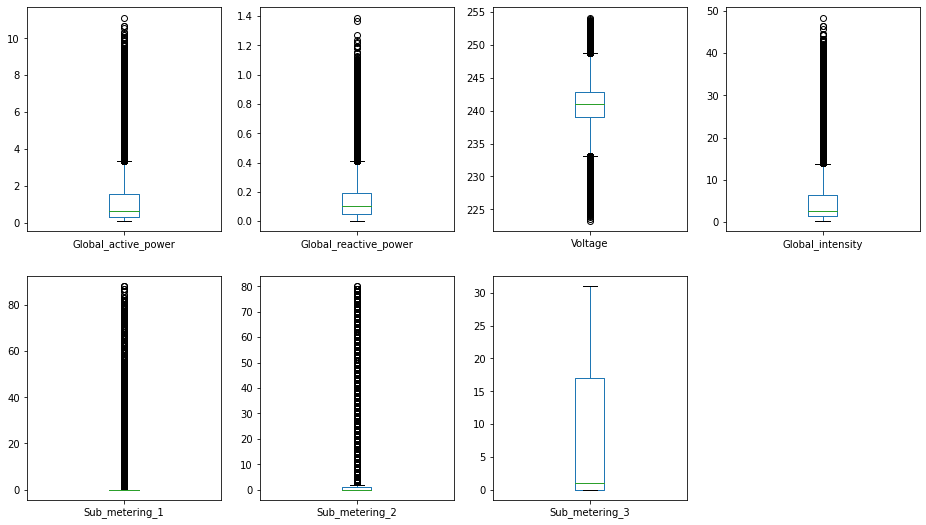

In [15]:
df.plot(kind='box', subplots=True, layout=(3, 4), figsize = (16, 14));

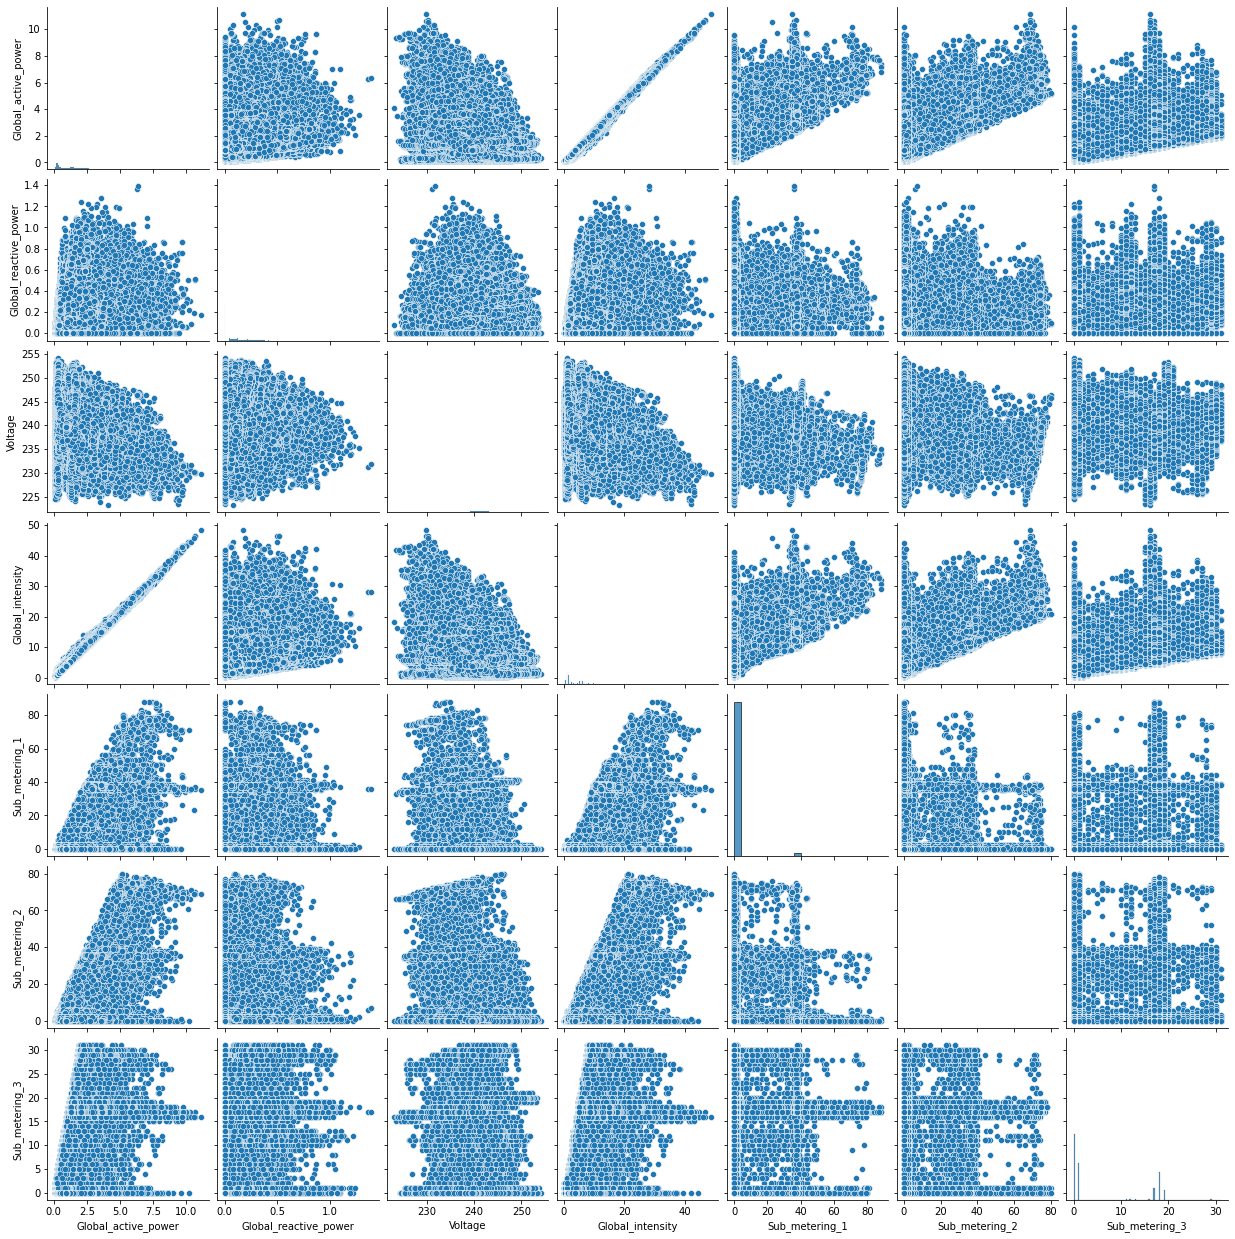

In [79]:
sns.pairplot(data=df)

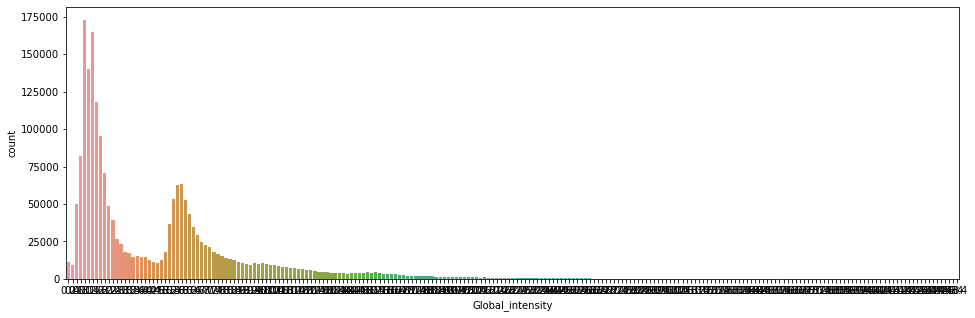

In [85]:
plt.subplots(figsize=(16,5))
sns.countplot(x=df.Global_intensity, data=df)
plt.show()

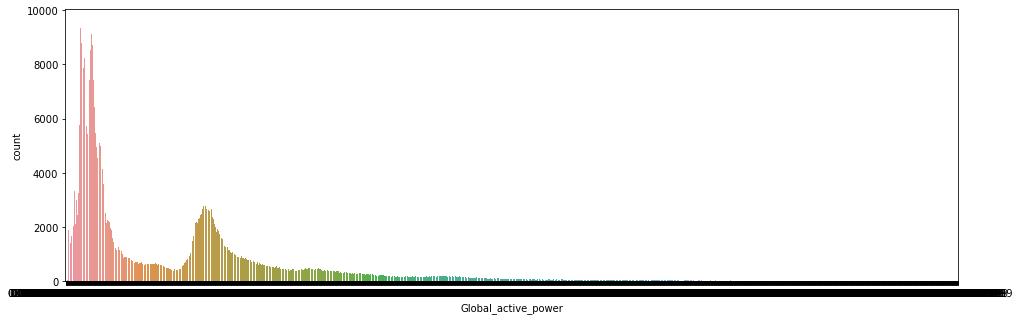

In [86]:
plt.subplots(figsize=(16,5))
sns.countplot(x=df.Global_active_power, data=df)
plt.show()

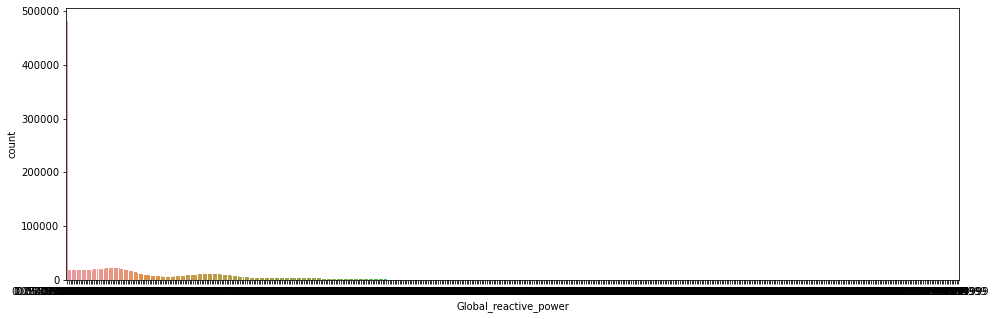

In [87]:
plt.subplots(figsize=(16,5))
sns.countplot(x=df.Global_reactive_power, data=df)
plt.show()

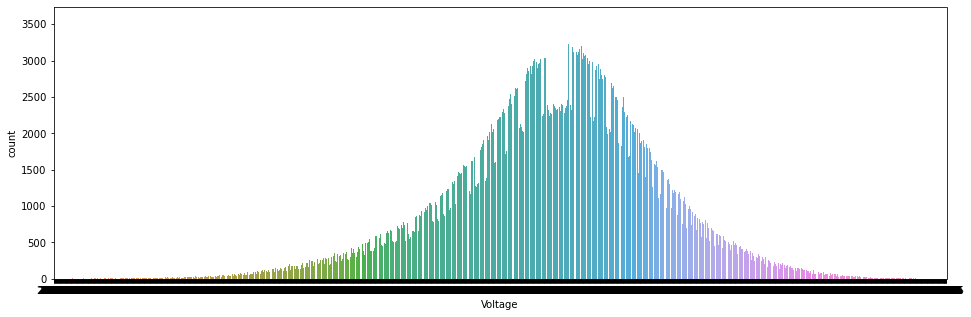

In [88]:
plt.subplots(figsize=(16,5))
sns.countplot(x=df.Voltage, data=df)
plt.show()

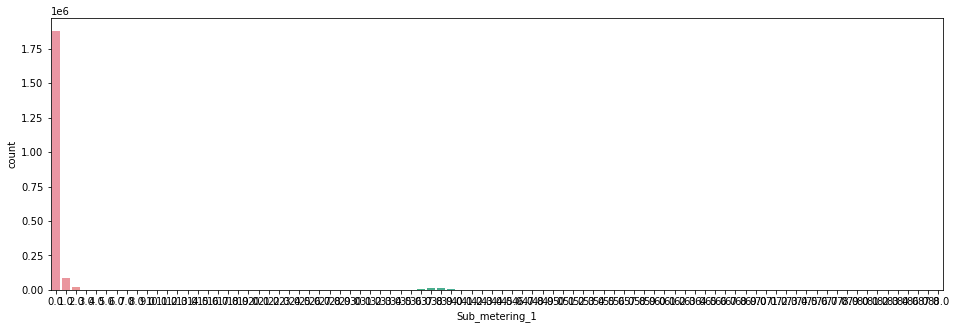

In [89]:
plt.subplots(figsize=(16,5))
sns.countplot(x=df.Sub_metering_1, data=df)
plt.show()

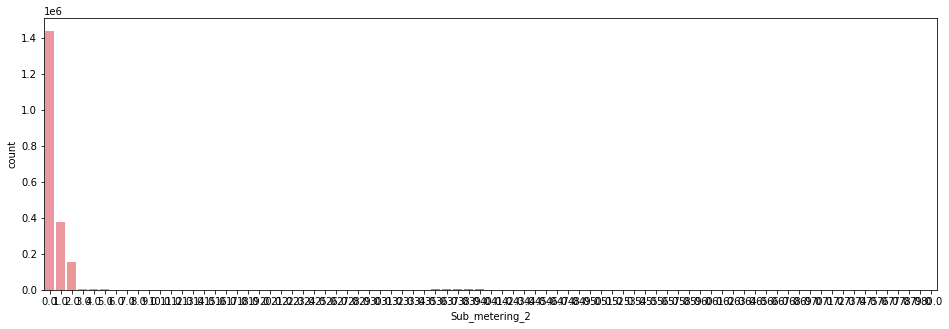

In [90]:
plt.subplots(figsize=(16,5))
sns.countplot(x=df.Sub_metering_2, data=df)
plt.show()

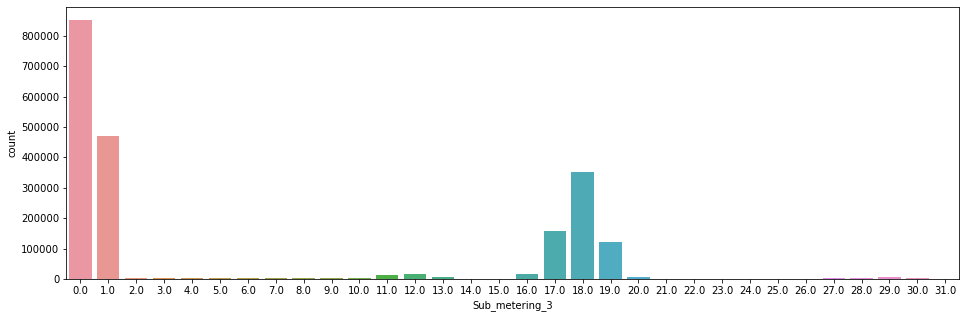

In [91]:
plt.subplots(figsize=(16,5))
sns.countplot(x=df.Sub_metering_3, data=df)
plt.show()

In [80]:
df.corr().style.background_gradient(cmap='coolwarm')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


# EDA pour Time Series

<AxesSubplot:xlabel='Time'>

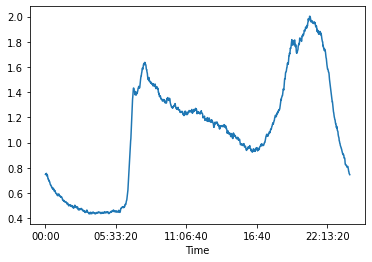

In [94]:
df_day = df.groupby(by=["Time"]).mean()
df_day.Global_active_power.plot()

In [18]:
df_date = df.copy()

In [20]:
df_date = df_date.set_index('DateTime')

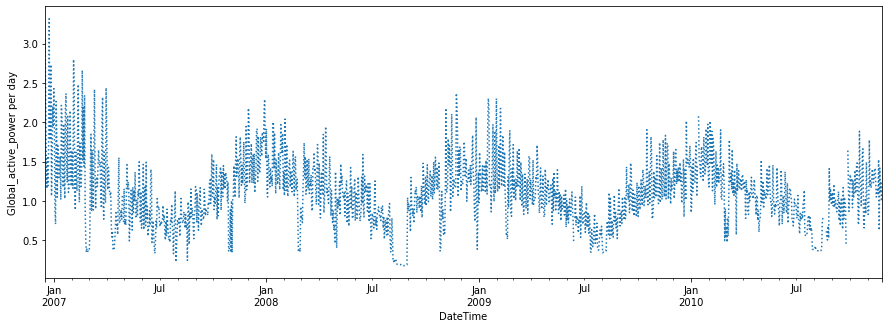

In [53]:
# plot target by day
f, ax1 = plt.subplots(1,1,figsize=(15,5))
dayly = df_date['Global_active_power'].resample('D').mean()
dayly.plot(style=[':', '--', '-'])
plt.ylabel('Global_active_power per day');

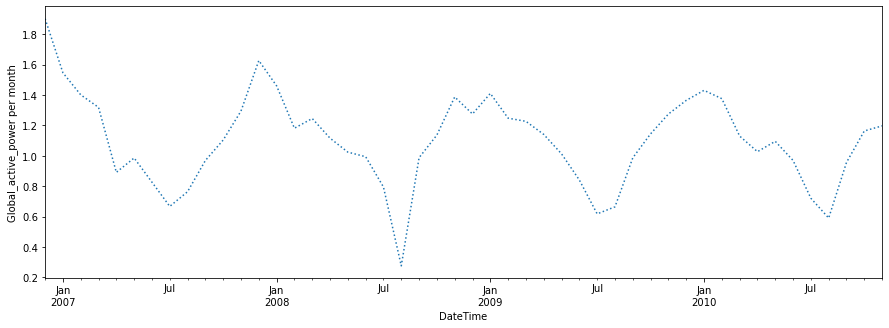

In [56]:
# plot target by month
f, ax1 = plt.subplots(1,1,figsize=(15,5))
monthly = df_date['Global_active_power'].resample('M').mean()
monthly.plot(style=[':', '--', '-'])
plt.ylabel('Global_active_power per month');